To install Rasa, open your terminal and run the following command:

In [1]:
!pip install rasa

  Using cached aiohttp-3.9.5-cp38-cp38-win_amd64.whl.metadata (7.7 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl.metadata (5.6 kB)
     ---------------------------------------- 0.0/149.2 kB ? eta -:--:--
     -------------------------------------- 149.2/149.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/40.9 kB ? eta -:--:--
     ---------------------------------------- 40.9/40.9 kB ? eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached scipy-1.10.1-cp38-cp38-win_amd64.whl.metadata (58 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp38-cp38-win_amd64.whl.metadata (14 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 k

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 8.12.2 requires prompt-toolkit!=3.0.37,<3.1.0,>=3.0.30, but you have prompt-toolkit 3.0.28 which is incompatible.


Creating a Rasa Project

In [2]:
!rasa init

┌────────────────────────────────────────────────────────────────────────────────┐
│ Rasa Open Source reports anonymous usage telemetry to help improve the product │
│ for all its users.                                                             │
│                                                                                │
│ If you'd like to opt-out, you can use `rasa telemetry disable`.                │
│ To learn more, check out https://rasa.com/docs/rasa/telemetry/telemetry.       │
└────────────────────────────────────────────────────────────────────────────────┘
Welcome to Rasa! 🤖

To get started quickly, an initial project will be created.
If you need some help, check out the documentation at https://rasa.com/docs/rasa.
Now let's start! 👇🏽



C:\Users\Icebrkruser\anaconda3\envs\chatbot\lib\site-packages\rasa\core\tracker_store.py:1044: MovedIn20Warning: Deprecated API features detected! These feature(s) are not compatible with SQLAlchemy 2.0. To prevent incompatible upgrades prior to updating applications, ensure requirements files are pinned to "sqlalchemy<2.0". Set environment variable SQLALCHEMY_WARN_20=1 to show all deprecation warnings.  Set environment variable SQLALCHEMY_SILENCE_UBER_WARNING=1 to silence this message. (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base: DeclarativeMeta = declarative_base()
C:\Users\Icebrkruser\anaconda3\envs\chatbot\lib\site-packages\rasa\shared\utils\validation.py:134: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
C:\Users\Icebrkruser\anaconda3\envs\chatbot\lib\site-packages\pkg_resources\__init__.py:3144: DeprecationWarning: Deprecated call to `pkg_resources.declare_name

Understanding Key Rasa Concepts
Before we start building our chatbot, let’s familiarize ourselves with some essential concepts in Rasa:

1. Intents: Intents represent the goals or purposes of user messages. For example, if a user says, “Tell me the weather forecast,” the intent might be “weather.”

2. Entities: Entities are pieces of information within user messages that the chatbot needs to extract. In the sentence, “What’s the weather in New York tomorrow?” “New York” is an entity representing a location.

3. Actions: Actions are responses or tasks that the chatbot performs. These can include sending a message, asking for user input, or performing custom actions like looking up information.

4. Stories: Stories define the conversations or dialogues your chatbot can have with users. They are sequences of intents and actions that represent different user scenarios.

RASA directory and file structure:

A simplified directory tree map for a Rasa project, along with explanations of the purpose of each directory and file:


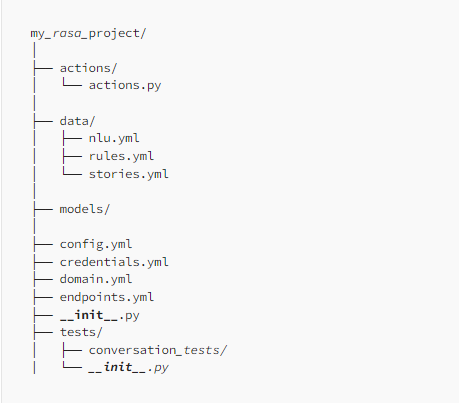

## Rasa Command Cheat Sheet

### Commands and Their Effects

- **`rasa init`**  
  Creates a new project with example training data, actions, and config files.

- **`rasa train`**  
  Trains a model using your NLU data and stories, saves the trained model in `./models`.

- **`rasa interactive`**  
  Starts an interactive learning session to create new training data by chatting with your assistant.

- **`rasa shell`**  
  Loads your trained model and lets you talk to your assistant on the command line.

- **`rasa run`**  
  Starts a server with your trained model.

- **`rasa run actions`**  
  Starts an action server using the Rasa SDK.

- **`rasa visualize`**  
  Generates a visual representation of your stories.

- **`rasa test`**  
  Tests a trained Rasa model on any files starting with `test_`.

- **`rasa test e2e`**  
  Runs end-to-end testing fully integrated with the action server that serves as acceptance testing.

- **`rasa data split nlu`**  
  Performs an 80/20 split of your NLU training data.

- **`rasa data split stories`**  
  Does the same as `rasa data split nlu`, but for your stories data.

- **`rasa data convert`**  
  Converts training data between different formats.

- **`rasa data migrate`**  
  Migrates 2.0 domain to 3.0 format.

- **`rasa data validate`**  
  Checks the domain, NLU, and conversation data for inconsistencies.

- **`rasa export`**  
  Exports conversations from a tracker store to an event broker.

- **`rasa evaluate markers`**  
  Extracts markers from an existing tracker store.

- **`rasa marker upload`**  
  Uploads marker configurations to the Analytics Data Pipeline.

- **`rasa license`**  
  Displays licensing information.

- **`rasa -h`**  
  Shows all available commands.


## Instructions for this first chabot
First, you'll need to install Rasa. You can do this using pip:

Copypip install rasa

Create a new Rasa project:
Once Rasa is installed, create a new project:

Copyrasa init
This command will create a new directory with all the necessary files for a Rasa project.

Understanding the project structure:
The main files you'll work with are:


domain.yml: Defines the chatbot's domain (intents, entities, slots, actions, etc.)
data/nlu.yml: Contains training data for natural language understanding
data/stories.yml: Defines conversation paths
config.yml: Configures the NLU and Core models


Define intents and examples:
Open data/nlu.yml and add some intents and example utterances. For example:

yamlCopynlu:
- intent: greet
  examples: |
    - hello
    - hi
    - hey

- intent: goodbye
  examples: |
    - bye
    - goodbye
    - see you later

- intent: ask_weather
  examples: |
    - what's the weather like?
    - is it sunny today?
    - will it rain tomorrow?

Define responses:
In domain.yml, add responses for your bot:

yamlCopyresponses:
  utter_greet:
  - text: "Hello! How can I help you?"

  utter_goodbye:
  - text: "Goodbye! Have a great day!"

  utter_weather:
  - text: "I'm sorry, I don't have access to weather information. You might want to check a weather app or website for that."

Define stories:
In data/stories.yml, define some conversation flows:

yamlCopystories:
- story: greet and goodbye
  steps:
  - intent: greet
  - action: utter_greet
  - intent: goodbye
  - action: utter_goodbye

- story: ask about weather
  steps:
  - intent: ask_weather
  - action: utter_weather

Train your model:
Run the following command to train your model:

Copyrasa train

Test your chatbot:
You can test your chatbot in the command line by running:

Copyrasa shell
This is a very basic setup to get you started. As you become more comfortable with Rasa, you can add more complex features like custom actions, forms for collecting information, and integration with external APIs.

## running rasa interactive

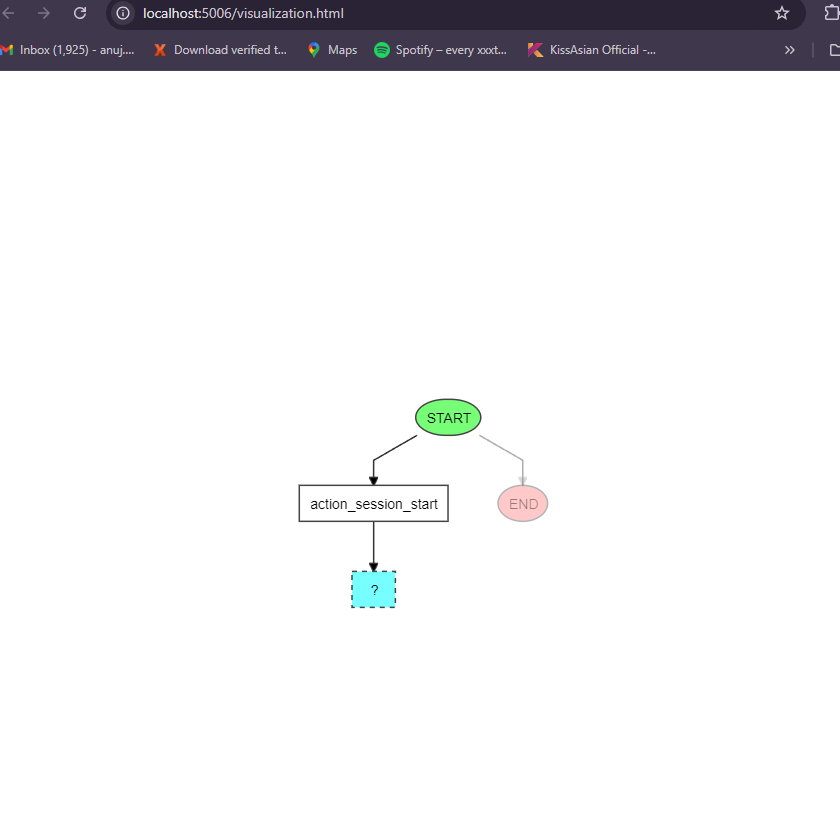

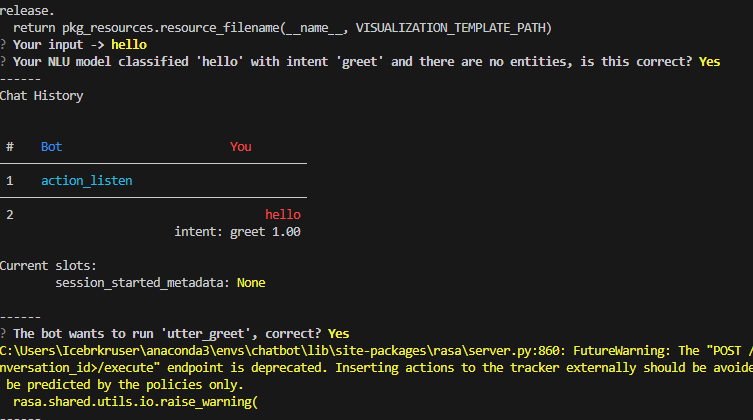

# Openweathermap API Inference for Personal Weather Assistant bot

In [1]:
from dotenv import load_dotenv
import os
import requests

api_key = os.getenv("OPENWEATHERMAP_API_KEY")
city = 'Kathmandu'
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'q':city,
    'appid':api_key,
    'units':'metric'
    }

response = requests.get(base_url,params=params)
response.raise_for_status()
weather_data = response.json()
print(weather_data)
temperature = weather_data['main']['temp']
description = weather_data['weather'][0]['description']

weather_info = f"The weather in {city} is {description} with the temperature of {temperature}."

print(weather_info)

HTTPError: 401 Client Error: Unauthorized for url: http://api.openweathermap.org/data/2.5/weather?q=Kathmandu&units=metric

The pipeline in Rasa NLU is a series of components that process the user's input sequentially. Each component in the pipeline takes the output of the previous component as its input. Here's a breakdown of the pipeline flow:

SpacyNLP:

This is the initial component that loads the spaCy model ("en_core_web_sm").
It provides the foundation for all spaCy-based components that follow.


SpacyTokenizer:

Splits the input text into tokens (words, punctuation) using spaCy's tokenization.


SpacyFeaturizer:

Converts tokens into feature vectors using spaCy's word vectors and linguistic features.


RegexFeaturizer:

Extracts features from user messages using regular expressions.
Useful for catching specific patterns in text.


LexicalSyntacticFeaturizer:

Extracts lexical and syntactic features from the text.
Helps in understanding the structure and meaning of sentences.


CountVectorsFeaturizer (2 instances):

First instance: Creates bag-of-words representations of the text.
Second instance: Creates character n-grams (substrings) of the text.
These help in capturing word frequency and character-level patterns.


DIETClassifier:

A multi-task model that performs intent classification and entity recognition.
Uses the features from previous steps to understand user intents and extract entities.


EntitySynonymMapper:

Maps synonyms of entities to a canonical value.
Useful for handling different ways users might refer to the same entity.


ResponseSelector:

Selects appropriate responses for the detected intent.
Helps in choosing the right bot utterance based on user input.


FallbackClassifier:

Assigns a fallback intent if the confidence of intent prediction is below a threshold.
Helps handle cases where the bot is unsure about the user's intent.


SpacyEntityExtractor:

Uses spaCy's named entity recognition to extract entities, specifically focusing on GPE (Geo-Political Entities) like city names.



This pipeline is designed to:

Thoroughly process and understand the text input.
Extract relevant features at word, character, and linguistic levels.
Classify user intents and extract entities, with a focus on geographical names.
Handle cases where the bot might be unsure about the user's intent.
Select appropriate responses based on the understood intent.

The flow allows for comprehensive text analysis, starting from basic tokenization and progressing to advanced intent classification and entity extraction, making it well-suited for a weather chatbot that needs to understand city names and weather-related queries.

In [ ]:
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

# Check the model name
print(f"Successfully loaded SpaCy model: {nlp.meta['name']}")